In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("상가업소정보_201912.csv", encoding="utf-8")

In [5]:
n = df.isnull().sum()

In [6]:
not_use = n.sort_values(ascending=False).head(9)

In [7]:
df.drop(not_use.index, axis=1, inplace=True)

In [8]:
cols_code = df.columns[df.columns.str.contains("코드|번호")]

In [9]:
df.drop(cols_code, axis=1, inplace=True)

In [10]:
df_food = df[df["상권업종대분류명"] == "음식"].copy()

In [11]:
df_seoul_food = df[(df["상권업종대분류명"] == "음식") &
                   (df["시도명"] == "서울특별시")].copy()

In [12]:
food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])

In [13]:
food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()

In [14]:
food_gu

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
                  ... 
중랑구   제과제빵떡케익      160
      중식            78
      커피점/카페       311
      패스트푸드        127
      한식          1251
Name: 상호명, Length: 348, dtype: int64

In [15]:
food_gu.unstack()

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0,1573.0,1573.0,11.0,1255.0,650.0,358.0,2790.0,786.0,4371.0
강동구,4.0,318.0,138.0,24.0,509.0,154.0,737.0,4.0,379.0,223.0,93.0,584.0,224.0,1636.0
강북구,2.0,208.0,97.0,6.0,329.0,63.0,475.0,4.0,203.0,134.0,55.0,259.0,123.0,1209.0
강서구,16.0,323.0,145.0,21.0,531.0,260.0,869.0,2.0,441.0,256.0,126.0,765.0,259.0,1753.0
관악구,11.0,324.0,118.0,11.0,461.0,183.0,790.0,6.0,324.0,165.0,109.0,516.0,196.0,1336.0
광진구,11.0,453.0,188.0,25.0,655.0,275.0,1142.0,1.0,490.0,270.0,194.0,810.0,278.0,2020.0
구로구,6.0,289.0,121.0,23.0,429.0,97.0,691.0,6.0,282.0,169.0,226.0,551.0,180.0,1322.0
금천구,9.0,176.0,102.0,9.0,268.0,75.0,413.0,1.0,225.0,94.0,93.0,369.0,100.0,1003.0
노원구,10.0,345.0,99.0,12.0,476.0,132.0,482.0,6.0,300.0,239.0,95.0,547.0,259.0,1227.0


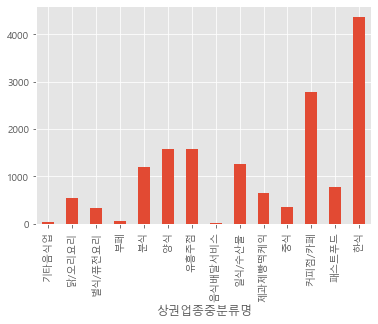

In [16]:
food_gu.unstack().loc["강남구"].plot.bar()

In [17]:
food_gu.reset_index()

,시군구명,상권업종중분류명,상호명
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127


In [18]:
food = food_gu.reset_index()

In [19]:
food.rename(columns={"상호명":"상호수"}, inplace=True)

In [20]:
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127


In [21]:
import numpy as np

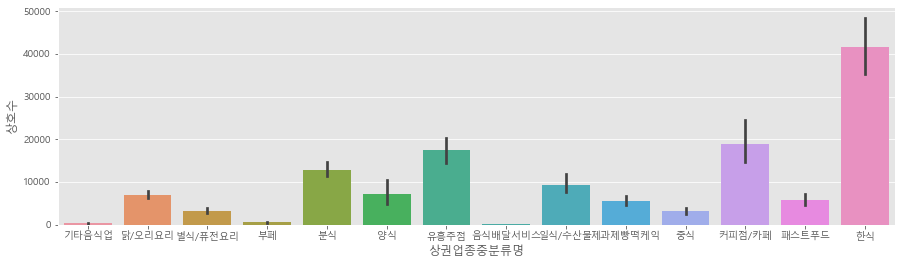

In [22]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수",
           estimator=np.sum)

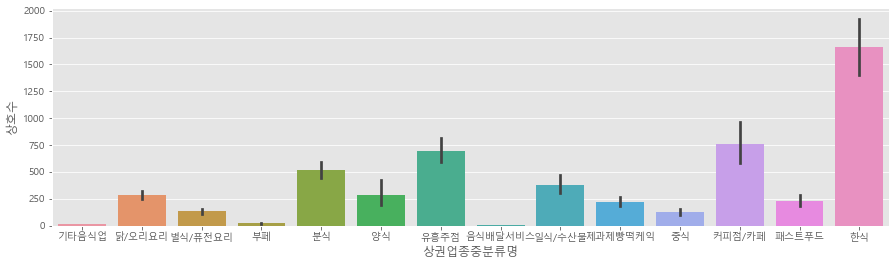

In [23]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수",
           estimator=np.mean)

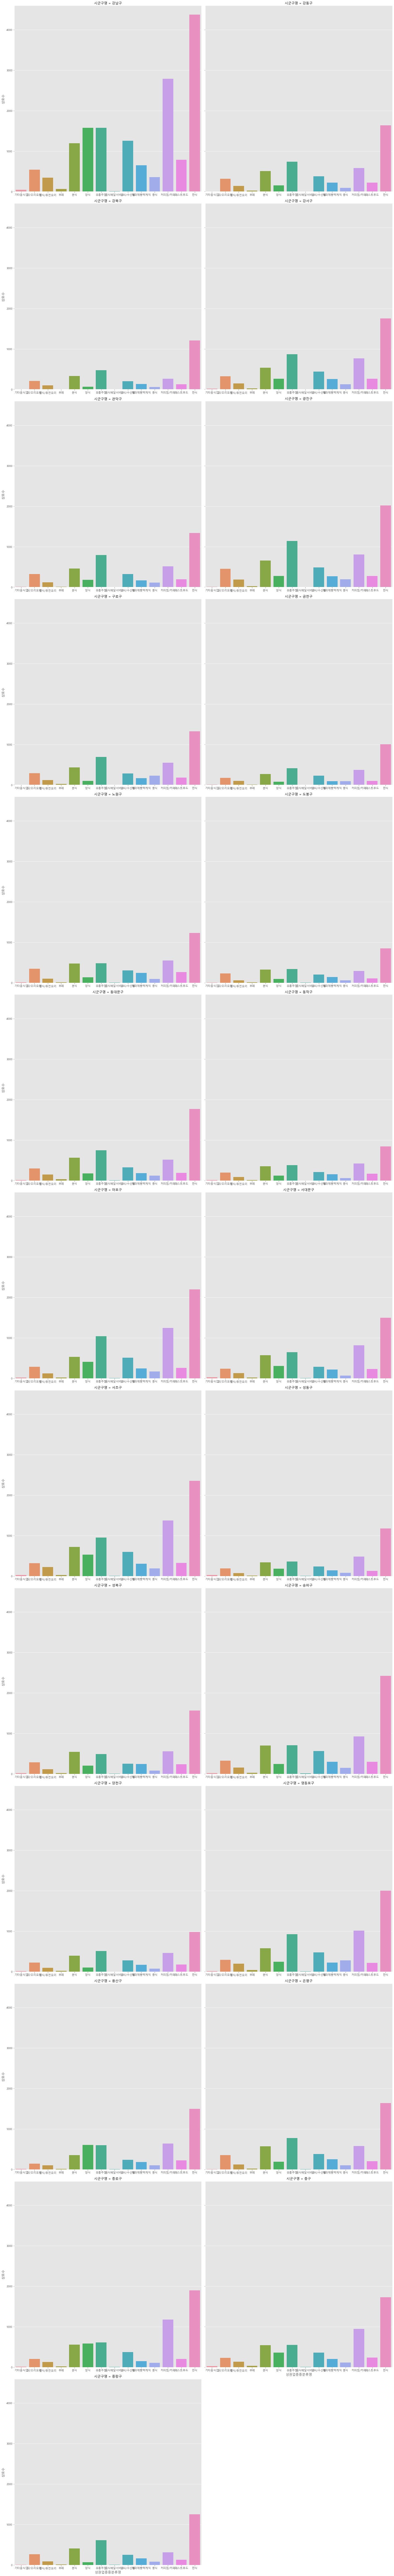

In [24]:
sns.catplot(
    data=food,
    x="상권업종중분류명",
    y="상호수",
    kind="bar",
    col="시군구명",
    col_wrap=2,
    sharex=False,
    height=10
)

In [25]:
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127
